# <center> Central Limit Theorem </center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [2]:
#choose values between 1-1000, choose 5000 values
np.random.seed(42)
uniform = np.random.uniform(1, 1000, 5000)


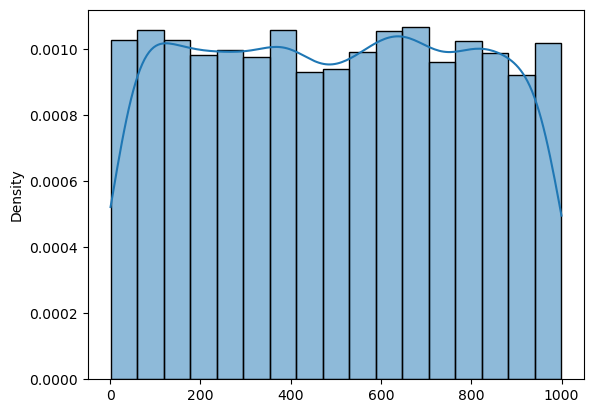

In [3]:
## Let's graph the density plot
sns.histplot(x=uniform,stat='density', kde=True);


In [14]:
## loop to take 1000 samples of 30 and calculate the means of each sample
np.random.seed(42)
sample_means = []
for i in range(1000):    
  sample = np.random.choice(uniform,size=30,replace=False)    
  sample_means.append(np.std(sample))
# Print the first 5 sample means
sample_means[0:5]


[289.72782968712806,
 252.8645635240502,
 286.1594379526106,
 302.9930823035462,
 320.8846064997714]

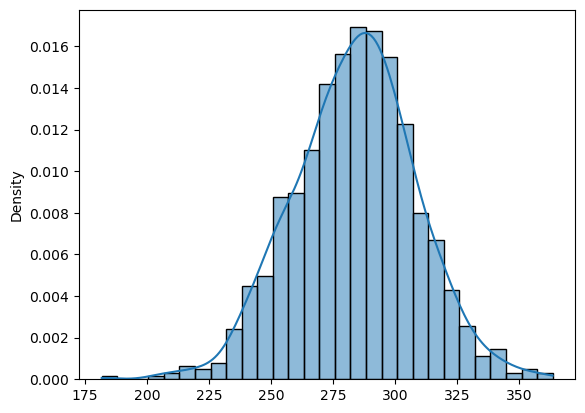

In [15]:
# visualize the sample means
sns.histplot(sample_means,kde=True,stat='density');



In [18]:
np.mean(sample_means)

283.66031392452993

In [19]:
np.std(uniform)

289.3150816054604

In [8]:
## Load the data
movie_url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSRzwOVZswzLMacwVwQJLB4WnDZIy46gxMxZzGtJs0FKCLhwXDb8kUI1wmo9-Nll0oo1EpgjFbBoUEV/pub?output=csv"
df = pd.read_csv(movie_url,index_col=0,parse_dates=['release_date'])
## Filter out movie population of interest and remove nulls
## keeping only movies released after 2000 and before 2020
df = df[(df['release_date'] > "2000") & (df['release_date'] <"2020")]
df = df.dropna(subset=['runtime'])
df.head(3)



,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
id,,,,,,,,,,,,,,,,,,,,,
1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,...,2015-02-20,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,...,2004-08-06,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,...,2014-10-10,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000


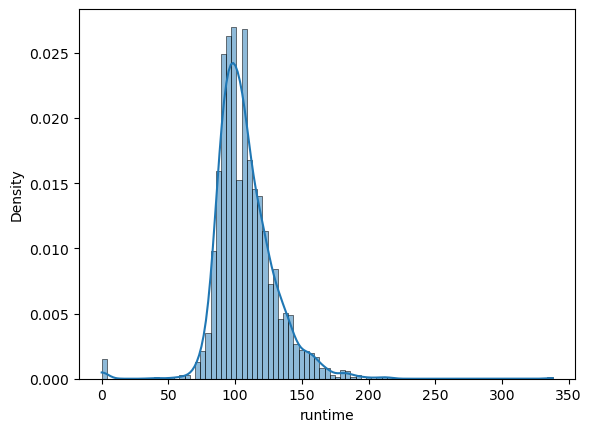

In [9]:
sns.histplot(x=df['runtime'], kde=True, stat='density');


In [10]:
stats.normaltest(df['runtime'])



NormaltestResult(statistic=498.6206359702571, pvalue=5.319914071356255e-109)

In [11]:
## loop to take 1000 samples of 30 and calculate the mean of each sample
np.random.seed(42)
sample_means = []
for i in range(1000):   
  sample = np.random.choice(df['runtime'], size=30, replace=False)    
  sample_means.append(np.mean(sample))
sample_means[0:5]



[109.33333333333333, 107.8, 109.43333333333334, 106.46666666666667, 110.9]

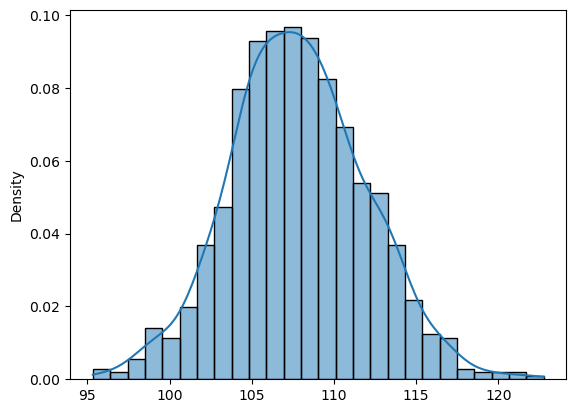

In [12]:
sns.histplot(sample_means,kde=True,stat='density');



In [13]:
stats.normaltest(sample_means)



NormaltestResult(statistic=4.216509433391504, pvalue=0.12144974578576584)